# Bank Churn Analysis

## Problem Statement

In the world of business, it is said that every customer that is lost leads to a loss of capital. Many banks today hope to gain a competitive edge and one of the most acknowledged problems is customer churn. 

Retaining existing customers and thereby increasing their lifetime value is important but there is little the banks can do about customer churn when they don’t see it coming in the first place. 

The aim of this study is to use historical data to learn from past customer behaviour and external triggers that led to churn and predict future occurrence of a churn-like event. This will allow the bank to prevent customer churn with targeted proactive retention.

## Dataset and Data Handling

In [20]:
# Dataset obtained from: https://www.kaggle.com/mathchi/churn-for-bank-customers 

### Import Packages

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# Import all the necessary libraries 
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Read Data

In [8]:
# Import data
df = pd.read_csv('churn.csv')

In [9]:
# Display top 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check for Duplicates

In [10]:
df.duplicated().sum()

0

### Check for missing values

In [11]:
# Check datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From the above, we know that the dataset has 10,000 rows and 14 columns.

As "Row Number", "Customer Id" and "Surname" has no effect to the analysis, we will remove them from the dataset shortly.

### Drop irrelevant columns

In [12]:
# Drop irrelevant columns 
# axis = 0 refers to the rows and axis = 1 refers to the columns

df = df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [13]:
# Display top 5 rows of the dataset after dropping the columns above

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

### Exploring Data

([<matplotlib.patches.Wedge at 0x7f92d468d2b0>,
 [Text(-0.6568642010431008, 0.8823431426537008, 'Exited'),
  Text(0.7165791284106553, -0.9625561556222191, 'Retained')],
 [Text(-0.3582895642053277, 0.4812780778111095, '20.4%'),
  Text(0.4180044915728822, -0.5614910907796278, '79.6%')])

(-1.0589043578561668,
 1.1613688442492547,
 -1.1857062610374767,
 1.1040812505255941)

Text(0.5, 1.0, 'Proportion of customers who exited')

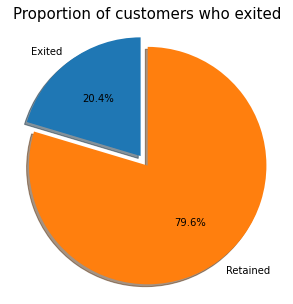

In [14]:
# Proportion of customers who churned based on the total customer base 

labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customers who exited", size = 15)

plt.show()

* The bank has lost ***20.4%*** of its total customer base. 

<AxesSubplot:xlabel='Geography', ylabel='count'>

<AxesSubplot:xlabel='Gender', ylabel='count'>

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

<AxesSubplot:xlabel='Tenure', ylabel='count'>

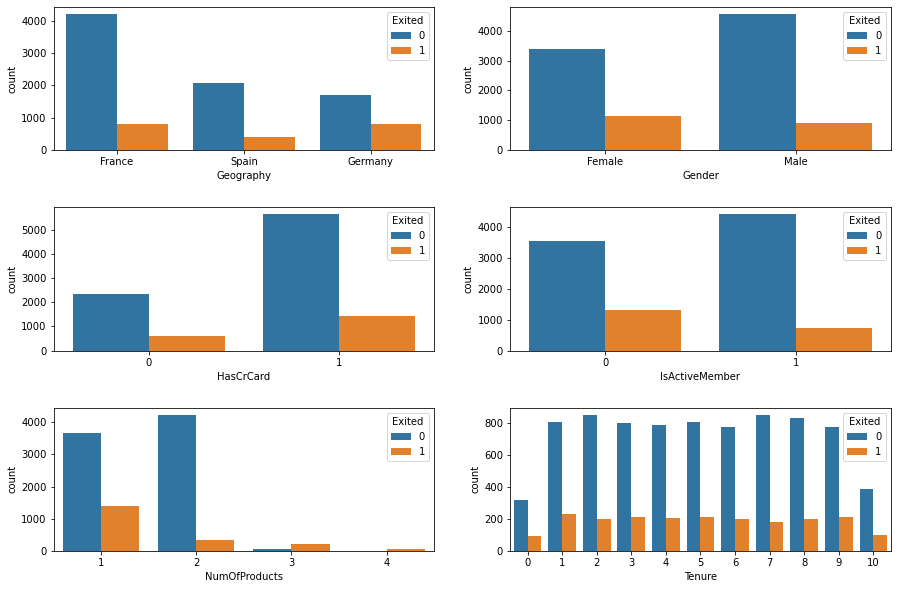

In [15]:
# Establish possible relations between the attributes/variables with Exit status

fig, axarr = plt.subplots(3, 2, figsize=(15, 10))

plt.subplots_adjust(hspace=0.4)

sns.countplot(x='Geography', hue = 'Exited', data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax=axarr[2][0])
sns.countplot(x='Tenure', hue = 'Exited',data = df, ax=axarr[2][1])

***Note: 0 = No, 1 = Yes***

It is observed that:
* There are twice as many customers from France than from Spain or Germany.
* Germany had the most customers who exited, followed closely by France and Spain. 
* There are more Male customers than Female customers. 
* There were a higher number of Females who exited. 
* Most of the customer base are credit card holders and there were a higher number of them who left. 
* Close to half of the total customer base is inactive. 
* Most of the customers who left were inactive and it is noted that active customers are leaving too.
* Majority of the customers own 1 or 2 products. 
* Most of the customers who own 3 or 4 products had churned. 
* Most of the customers who left had a tenure of between 1 - 9 years. 

<AxesSubplot:>

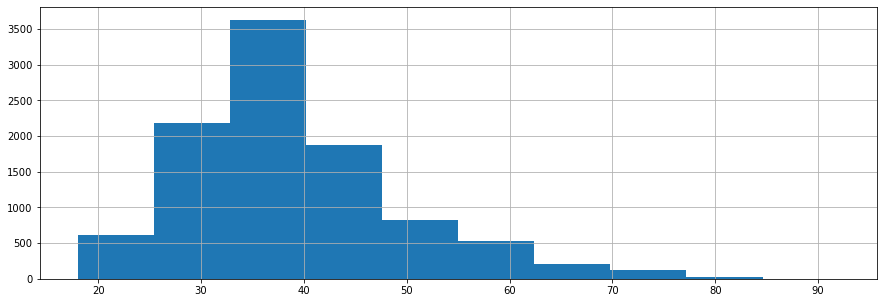

In [16]:
# Age distribution of customer

df['Age'].hist(figsize=(15,5))

* It is observed that most of the customers are between ***25 to 50*** years old.

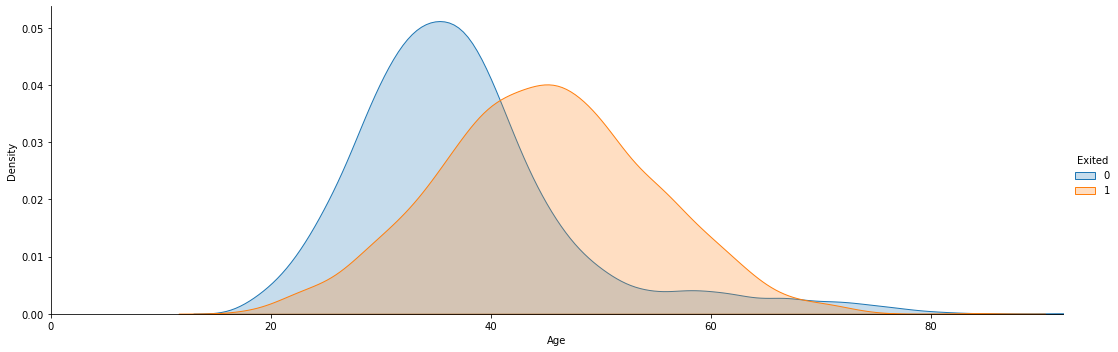

In [17]:
# Age distribution of customer who exited & retained

facet = sns.FacetGrid(df, hue="Exited", height=5, aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

plt.show()

* Most of the customers who exited were between ***40 to 60*** years old
* The retained customers are mostly between ***20 to 50*** years old

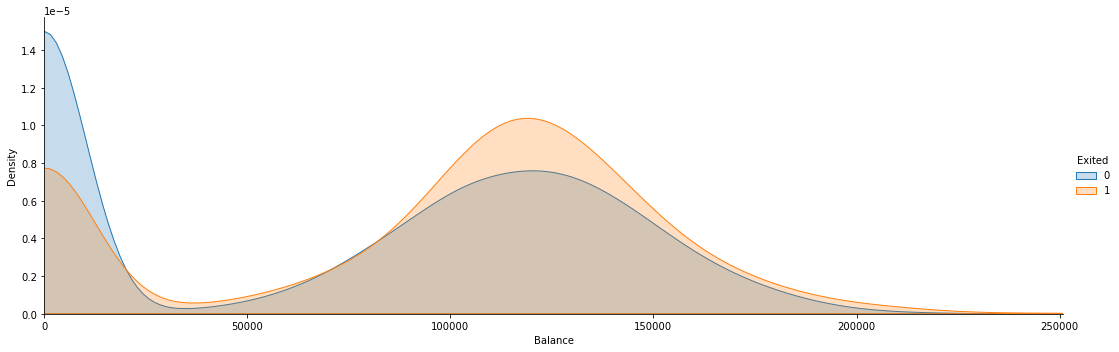

In [18]:
# Balance distribution of customer who exited & retained

facet = sns.FacetGrid(df, hue="Exited", height=5, aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, df["Balance"].max()))
facet.add_legend()

plt.show()

* Most of the customers who exited had balances of more than ***100k***
* The bank has a high number of retained customers with zero balances in their account
* These will impact the bank's capacity to lend as it is losing customers with high balances

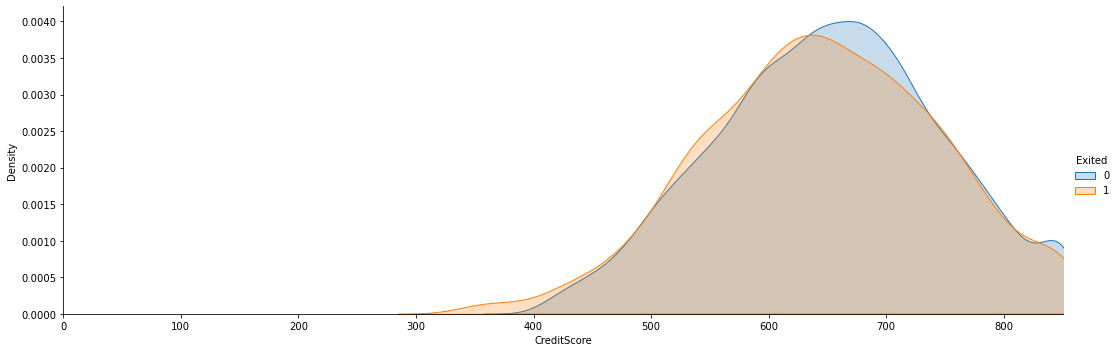

In [19]:
# Credit Score distribution of customer who exited & retained

facet = sns.FacetGrid(df, hue="Exited", height=5, aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, df["CreditScore"].max()))
facet.add_legend()

plt.show()

* Credit Score distribution looks normal.

In [20]:
# One Hot Encoding of Geography and Gender into numerical values to define correlation of attributes
cate_list = ['Geography', 'Gender']
df1 = pd.get_dummies(df, columns = cate_list, prefix = cate_list)

In [21]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

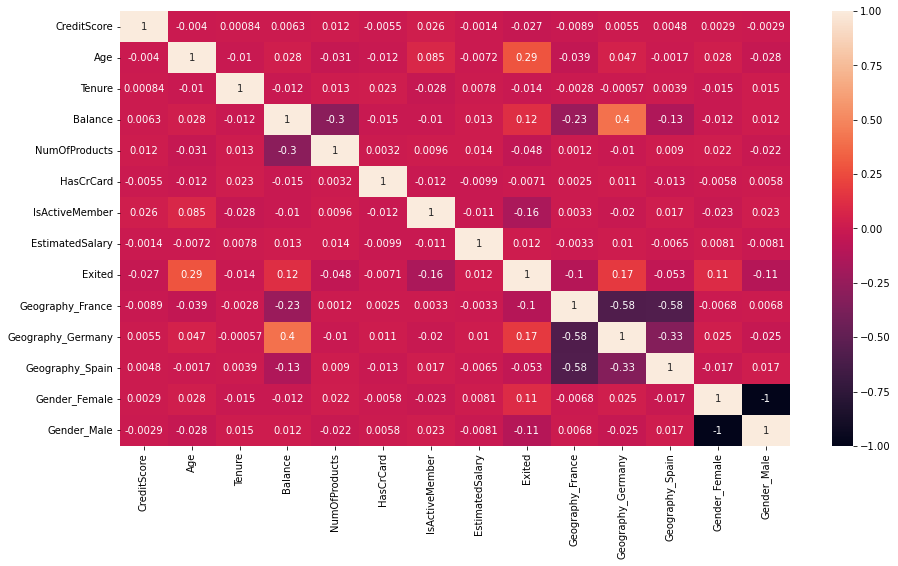

In [22]:
# Heatmap showing correlation values between variables
corr = df1.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

* From the correlation matrix, it is observed that the variables that have high correlation with churn are: 
    * Age
    * Balance
    * EstimatedSalary
    * Geography_Germany
    * Gender_Female

### Detecting Outliers

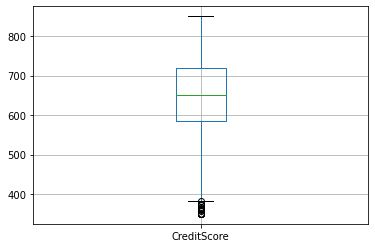

In [23]:
boxplot = df1.boxplot(column=['CreditScore'])

There are no values that are too faraway from the min and max value.

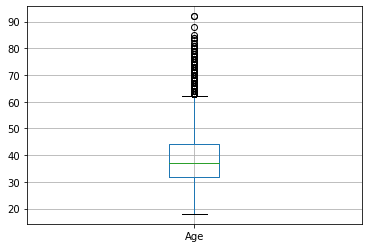

In [24]:
boxplot = df1.boxplot(column=['Age'])

There are a few outliers as seen from the extreme values for the age boxplot. 

In [25]:
# Replacing outliers with median.

median = df1.loc[df1['Age']<85, 'Age'].median()
df1["Age"] = np.where(df1["Age"] >85, median,df1['Age'])

In [26]:
# Max value of Age is now 85.

df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.905700,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.449427,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,85.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


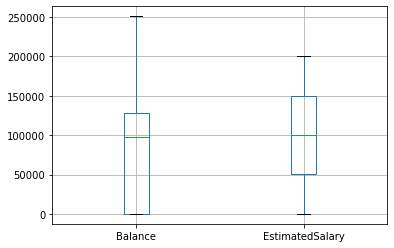

In [22]:
boxplot = df1.boxplot(column=['Balance', 'EstimatedSalary'])

The Balance and Estimated Salary box plots are normal.

## Split, Train and Test Data for Model Fitting

In [27]:
# Split dataset into Training set and Testing sets

X = df1.drop("Exited", axis=1)
y = df1["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2967          579  39.0       5  117833.30              3          0   
700           750  32.0       5       0.00              2          1   
3481          729  34.0       9   53299.96              2          1   
1621          689  38.0       5   75075.14              1          1   
800           605  52.0       7       0.00              2          1   
...           ...   ...     ...        ...            ...        ...   
9225          594  32.0       4  120074.97              2          1   
4859          794  22.0       4  114440.24              1          1   
3264          738  35.0       5  161274.05              2          1   
9845          590  38.0       9       0.00              2          1   
2732          623  48.0       1  108076.33              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
2967               0          5831.00                 0  

### Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

MinMaxScaler()

In [29]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.358209,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
1,0.516,0.343284,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
2,0.304,0.358209,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.698,0.313433,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,1.000,0.373134,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.313433,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.253731,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.268657,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.358209,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0,0.0,1.0


### Apply KNN Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

y_pred_knn = knn_model.predict(X_test)

#print prediction score
accuracy_score(y_test, y_pred_knn)

KNeighborsClassifier()

0.7624

### Evaluate Model Performance

Text(0.5, 1.0, 'Confusion Matrix')

Training Accuracy : 0.8166666666666667
Testing Accuracy : 0.7624


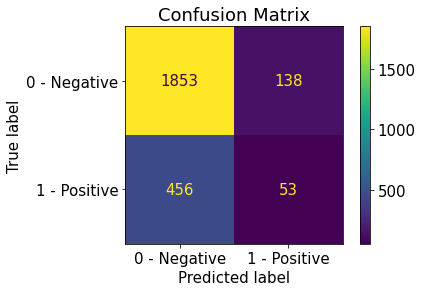

In [32]:
# Confusion Matrix

font = {'size'   : 15}
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred_knn) # calculate
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0 - Negative', '1 - Positive']).plot() # visualize
plt.title('Confusion Matrix')


# print training and testing scores
print("Training Accuracy :", knn_model.score(X_train, y_train))

print("Testing Accuracy :", knn_model.score(X_test, y_test))

array([0.4, 0. , 0.4, ..., 0.2, 0. , 0.4])

[]

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

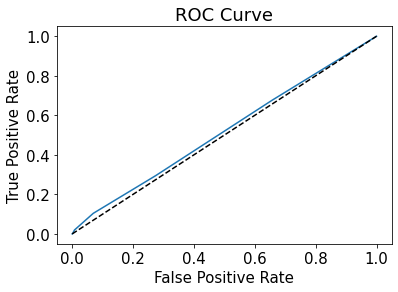

AUC score:  0.5174069165863281


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import RocCurveDisplay
y_score = knn_model.predict_proba(X_test)[:,1]
y_score


fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label=knn_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr=fpr, tpr=tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#print AUC score
print('AUC score: ',roc_auc_score(y_test, knn_model.predict(X_test))) 

The KNN model was fitted on the training data for the purpose of predicting clients who are likely to churn. The results shows that this model has an accuracy of 76.2% and auc score of 0.517. Next we shall run other models to evaluate which model fits the training data with the best accuracy.

### Apply Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LoR = LogisticRegression()
LoR_model = LoR.fit(X_train, y_train)
y_pred_LoR = LoR_model.predict(X_test)

# print prediction score
print (accuracy_score(y_test, y_pred_LoR)) 

0.7888


### Evaluate model performance

Text(0.5, 1.0, 'Confusion Matrix')

Training Accuracy : 0.7909333333333334
Testing Accuracy : 0.7888


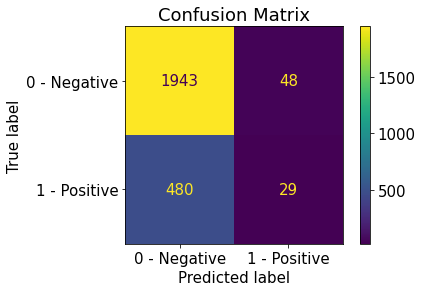

In [35]:
font = {'size'   : 15}
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred_LoR) # calculate
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0 - Negative', '1 - Positive']).plot() # visualize
plt.title('Confusion Matrix')


#print training and testing scores

print("Training Accuracy :", LoR_model.score(X_train, y_train))

print("Testing Accuracy :", LoR_model.score(X_test, y_test))

array([0.22257435, 0.33841045, 0.18393492, ..., 0.0914789 , 0.19265428,
       0.11778053])

[]

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

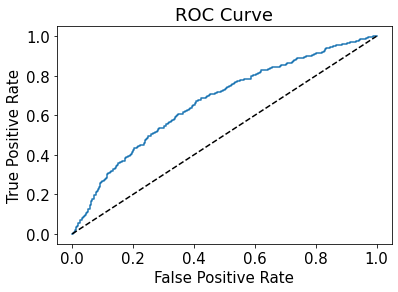

AUC score:  0.5164329857640324


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import RocCurveDisplay
y_score = LoR_model.predict_proba(X_test)[:,1]
y_score


fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label=LoR_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr=fpr, tpr=tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#print AUC score
print('AUC score: ',roc_auc_score(y_test, LoR_model.predict(X_test))) 

The results shows that the logistic regression model has an accuracy of 78.9% and auc score of 0.516.

### Apply Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
RF_model.fit(X_train, y_train)
# Make predictions
y_pred_rf = RF_model.predict(X_test)
probs = RF_model.predict_proba(X_test)

#print accuracy score
print (accuracy_score(y_test, y_pred_rf))

RandomForestClassifier(max_leaf_nodes=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=50)

0.8592


### Evaluate Model Performance

Text(0.5, 1.0, 'Confusion Matrix')

Training Accuracy : 0.8626666666666667
Testing Accuracy : 0.8592


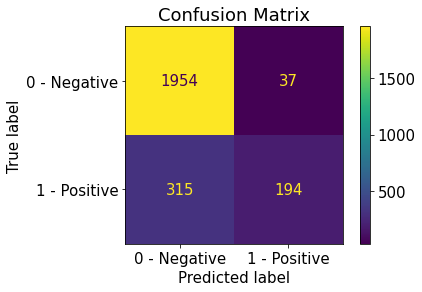

In [38]:
font = {'size'   : 15}
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred_rf) # calculate
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0 - Negative', '1 - Positive']).plot() # visualize
plt.title('Confusion Matrix')


#print training and testing scores
print("Training Accuracy :", RF_model.score(X_train, y_train))

print("Testing Accuracy :", RF_model.score(X_test, y_test))

array([0.24614801, 0.19566506, 0.20296901, ..., 0.17756017, 0.18558919,
       0.11103042])

[]

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

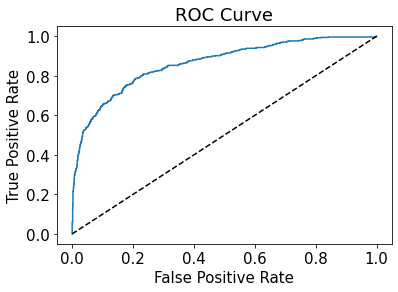

AUC score:  0.6812779314380331


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import RocCurveDisplay
y_score = RF_model.predict_proba(X_test)[:,1]
y_score


fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label=RF_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr=fpr, tpr=tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('AUC score: ',roc_auc_score(y_test, RF_model.predict(X_test))) 

The results shows that the random forest classifier has an accuracy of 85.9% and auc score of 0.681, which are higher than the earlier models.

<AxesSubplot:>

Age                  0.379978
NumOfProducts        0.289149
IsActiveMember       0.081284
Balance              0.073252
Geography_Germany    0.066639
CreditScore          0.030018
EstimatedSalary      0.023614
Geography_France     0.014157
Gender_Female        0.012578
Gender_Male          0.012048
Tenure               0.009796
Geography_Spain      0.006328
HasCrCard            0.001158
dtype: float64

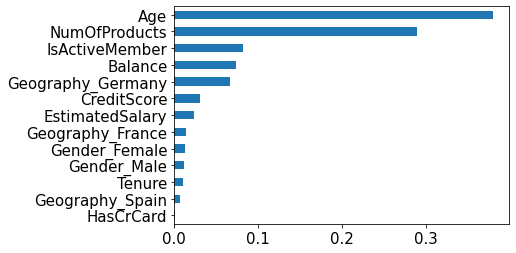

In [40]:
# Getting the weights of all the variables on the RF model which has the highest accuracy.

influence = RF_model.feature_importances_
weights = pd.Series(influence,
                 index=X.columns.values)
weights.sort_values()[-13:].plot(kind = 'barh')
weights.sort_values(ascending = False)

Based on the above, it is observed that Age has the highest influence on the RF model.

### Model tuning

In [41]:
#Grid Seach CV to finetune the parameters of the KNN model

from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

0.796
{'n_neighbors': 28}
KNeighborsClassifier(n_neighbors=28)


In [42]:
# Put the best params to test

best_model = KNeighborsClassifier(n_neighbors = 28)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

KNeighborsClassifier(n_neighbors=28)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred_best)

#print confusion matrix, accuracy and AUC score
print(cm)
print (accuracy_score(y_test, y_pred_best))
print (roc_auc_score(y_test, y_pred_best))

[[1991    0]
 [ 508    1]]
0.7968
0.5009823182711198


Text(0.5, 1.0, 'Confusion Matrix')

Training Accuracy : 0.7962666666666667
Testing Accuracy : 0.7968


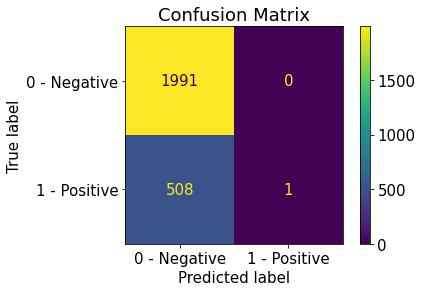

In [44]:
font = {'size'   : 15}
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred_best) # calculate
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0 - Negative', '1 - Positive']).plot() # visualize
plt.title('Confusion Matrix')

#print training and testing scores
print("Training Accuracy :", best_model.score(X_train, y_train))

print("Testing Accuracy :", best_model.score(X_test, y_test))

array([0.25      , 0.17857143, 0.32142857, ..., 0.21428571, 0.28571429,
       0.21428571])

[]

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

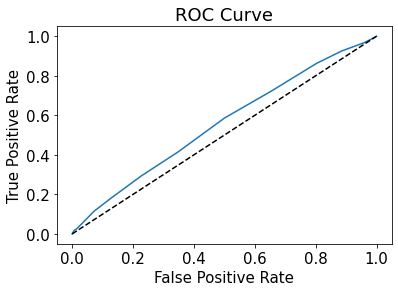

AUC score:  0.5009823182711198


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import RocCurveDisplay
y_score = best_model.predict_proba(X_test)[:,1]
y_score


fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label=best_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr=fpr, tpr=tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#print AUC score
print('AUC score: ',roc_auc_score(y_test, best_model.predict(X_test))) 

After tuning, the accuracy score of the KNN model improved from 76.2% to 79.7% but is still lower than Random Forest model.

## Conclusion

* Random Forest Classifier was the most efficient model as compared to KNN model and Logistic Regression model
* Accuracy of Random Forest is 85.9%, followed by 78.9% for Logistic Regression and 76.2% for KNN on test set
* Random Forest Classifier also did a better job of classifying the positive class in the dataset among the other models
* Age has the highest correlation to customers churning in both the correlation matrix and the weights of the variables on the Random Forest Classifier
* To achieve better accuracy and AUC scores, we can consider exploring other machine learning models.
* It will be useful if more variables can be included in the dataset for more accurate predictions, like:
    * Education level
    * Occupation 
    * Customer segmentation, i.e. salary customer, loan customer or credit card user and their product types